# Project 2 : Analysis of Mobile Phone Cost

**Start Date: 3/31/2022, Due Date: 4/18/2022, By the midnight 11:59 EST**

NOTE: There are always last minute issues submitting the projects. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="image.jpeg" width="500" height="200" align="left"/>

**Individual Assignment:** Please EDIT this cell and add your name
    
    Aidan Horn


**Desired outcome of the project.**
* In this project we will look at mobile phone cost from the dataset data.csv.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!

**Data Description.**

The dataset data.csv is available from our project website: https://github.com/ds3010s22/ds3010_projects, and 
is originally from Kaggle: https://www.kaggle.com/code/dansbecker/classification/data?select=train.csv

The data contains 20 features including 
* battery_power: total energy a battery can store in one time measured in mAh
* blue: has bluetooth or not 
* clock_speed: speed at which microprocessor executes instructions 
* dual_sim: has dual sim support or not
* four_g: has 4G or not
* etc.

The target is the price range, which has 4 classes including 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

**Required Readings:** 
* This project will be based upon the scikit-learn Python library
* Read about deep learning at https://scikit-learn.org/stable/modules/neural_networks_supervised.html
* Read about Scikit-learn packages (LinearSVC and Logistic regression): 
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    * https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Pandas (https://pandas.pydata.org/)
* Numpy (www.numpy.org)
* Matplotlib (matplotlib.org)
* Scikit-learn (scikit-learn.org).

**NOTE**
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Read the data.

* Read the dataset with pandas and split it into train set (80%) and test set (20%)
* get the x_train, y_train (the features and the target for train set)
* get the x_test, y_test (the features and the target for test set)

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('data.csv')
data['price_range'] += 1

for col in data.columns:
    if len(pd.unique(data[col])) == 2:
        data[col] = data[col].astype('bool')

y = data['price_range']
X = data.drop('price_range', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#data.info()

## Problem 1 (20 points): Machine learning algorithms


* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * Logistic regression
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [304]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#we will use the standard scaler to z-transform the features to standardize the distances in the data.

clf = make_pipeline(StandardScaler(), 
                    LinearSVC(random_state=0,
                              max_iter = 10000, tol=1e-5))
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(clf.score(x_test,y_test))

cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

print(cf)

print()

print(classification_report(y_test, y_pred))

0.875
Actual      1   2   3    4
Predicted                 
1          95   5   0    0
2           0  68  17    0
3           0  19  73    0
4           0   0   9  114

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        95
           2       0.80      0.74      0.77        92
           3       0.79      0.74      0.76        99
           4       0.93      1.00      0.96       114

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.88      0.87       400



In [305]:
from sklearn.linear_model import LogisticRegression

clf = make_pipeline(StandardScaler(),
                    LogisticRegression(random_state=0, solver = 'saga', 
                                       max_iter = 10000, multi_class = "multinomial"))
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(clf.score(x_test,y_test))

cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

print(cf)

print()

print(classification_report(y_test, y_pred))

0.95
Actual      1   2   3    4
Predicted                 
1          91   2   0    0
2           4  89   5    0
3           0   1  89    3
4           0   0   5  111

              precision    recall  f1-score   support

           1       0.98      0.96      0.97        95
           2       0.91      0.97      0.94        92
           3       0.96      0.90      0.93        99
           4       0.96      0.97      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [24]:
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(x_test)
cumsum_var = pca.explained_variance_ratio_.cumsum() * 100

colors = [y_t if y_p == y_t else (y_p) * -1 for y_p,y_t in zip(y_pred,y_test)]

fig = px.scatter_3d(
    components, x=0, y=1, z=x_test.index, color=colors, size=0.1*np.ones(len(x_test)), opacity = 1,
    title=f'Sum of Explained Variance of PC1 and PC2: {cumsum_var[1]:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', 'z': 'index'},
    width=800, height=500
)
fig.show()

Using the PCA scores, we can determine which features are the most important so we can better analyze why certain points may have been missclassified.

In [150]:
#pd.DataFrame(pca.components_, columns = list(x_train.columns))

pc1_f = x_train.columns[np.argmax(abs(pca.components_[0]))]
pc2_f_s = pca.components_[0][np.argmax(abs(pca.components_[0]))]

print(f"The largest factor score for PC1 is {pc1_f} with a score of {pc2_f_s}")

pc2_f = x_train.columns[np.argmax(abs(pca.components_[1]))]
pc2_f_s = pca.components_[1][np.argmax(abs(pca.components_[1]))]

print(f"The largest factor score for PC2 is {pc2_f} with a score of {pc2_f_s}")

The largest factor score for PC1 is ram with a score of -0.9998093578006496
The largest factor score for PC2 is px_height with a score of 0.7257183548248759


In [158]:
sum_scores = np.dot(pca.explained_variance_ratio_, abs(pca.components_))

print("Factors in order of importance")
for i in np.argsort(-sum_scores):
    col = x_train.columns[i]
    print(f"Factor: {col} | Sum of Weighted Score: {round(sum_scores[i],2)} | Type: {x_train[col].dtype}")

Factors in order of importance
Factor: ram | Sum of Weighted Score: 0.69 | Type: int64
Factor: px_width | Sum of Weighted Score: 0.16 | Type: int64
Factor: px_height | Sum of Weighted Score: 0.15 | Type: int64
Factor: battery_power | Sum of Weighted Score: 0.11 | Type: int64
Factor: mobile_wt | Sum of Weighted Score: 0.0 | Type: int64
Factor: int_memory | Sum of Weighted Score: 0.0 | Type: int64
Factor: talk_time | Sum of Weighted Score: 0.0 | Type: int64
Factor: pc | Sum of Weighted Score: 0.0 | Type: int64
Factor: sc_h | Sum of Weighted Score: 0.0 | Type: int64
Factor: sc_w | Sum of Weighted Score: 0.0 | Type: int64
Factor: fc | Sum of Weighted Score: 0.0 | Type: int64
Factor: n_cores | Sum of Weighted Score: 0.0 | Type: int64
Factor: wifi | Sum of Weighted Score: 0.0 | Type: bool
Factor: touch_screen | Sum of Weighted Score: 0.0 | Type: bool
Factor: three_g | Sum of Weighted Score: 0.0 | Type: bool
Factor: clock_speed | Sum of Weighted Score: 0.0 | Type: float64
Factor: dual_sim | S

The most important factors are ram, px_width, px_height, and better_power. We will use these values as benchmarks to identify why certain points may have been missclassified.
Clearly most of the important factors are not binary categorical variables

We will select two points that have been misclassified by logstic regression, index 1341 which should have been classified as a 2 but was missclassified as 3, and index 935 which should have been classified as 4 but was missclassified as 3. Examing the graph of PC1 and PC2, we see that these points are on the edges of their respective zones. 

In [165]:
indexes = [1341, 935]

locater = ["Misclassified" if i in indexes else "Normal" for i in x_test.index]

Even though we know most of the factors are not important, we will go ahead and visualize the distributions of the features with respect to the price range. For non-categorical data, we will plot the missclassified values alongside.

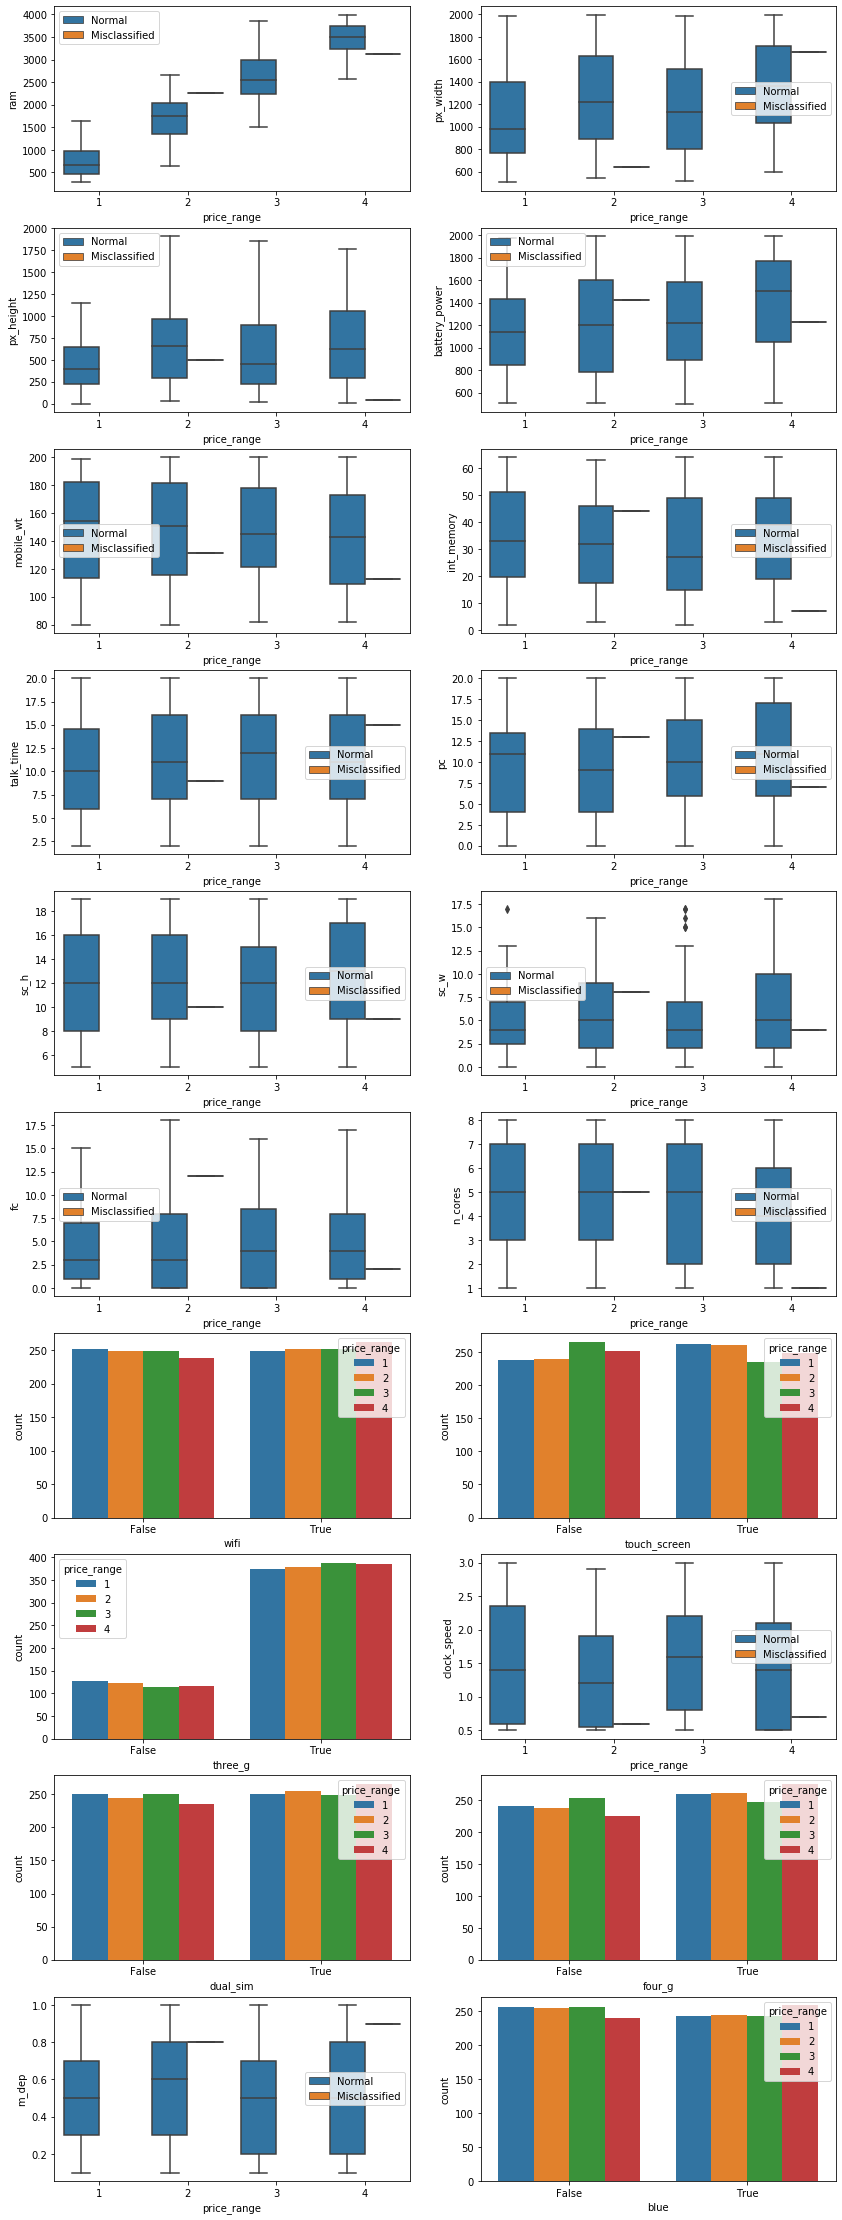

In [166]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(14, 40))

for i,ax in zip(np.argsort(-sum_scores), axs.reshape(-1)):
    
    col = x_train.columns[i]
    
    if x_test[col].dtype != 'bool': 
        sns.boxplot(y = x_test[col], x = y_test, hue = locater, ax = ax)
    else:
        sns.countplot(x = col, hue = "price_range", data = data, ax = ax)

Examining the data, it is difficult to conjecture why the datapoint were missclassified, but we have some clues. For point 965 (pred = 3, actual 4), we can see that its battery_power is much closer to the mean of class 3 (high) than it is to the mean of class 4 (very high). For point 1341, the ram is much higher than average for a phone of class 2 (medium) and more in line with a phone from class 3 (high)

## Problem 2 (20 points): Use a Multi-Layer Perceptron (MLP) for classifying the costs.  Explore the parameters for the MLP and compare the accuracies against your algorithms in Problem 1.

**Read the documentation for the MLPClassifier class at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.** 
* Note: This is *very similar* to using the LinearSVC and Logistic regression classes above!
* Try different values for "hidden_layer_sizes".  What do you observe in terms of accuracy?
* Try different values for "activation". What do you observe in terms of accuracy?


In [313]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score 

#f = plt.figure()
#f.set_figwidth(60)
#f.set_figheight(40)

mlp_performance = pd.DataFrame(columns = ["Hidden Layer Size", 
                                          "Activation", 
                                          "Solver", 
                                          "Precision", 
                                          "Recall",
                                          "F1-Score",
                                          "Time to Fit",
                                          "Time to Predict"])

for hls in [(1,),(7,),(3,3,),(7,3,),(20,7,3,)]:
    for activation in ['identity','logistic','tanh','relu']:
        for solver in ['lbfgs', 'sgd', 'adam']:
        
            clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = hls,
                                                        activation = activation,
                                                        solver = solver,
                                                        max_iter=2000))

            time_to_fit = %timeit -n1 -r1 -o clf.fit(x_train, y_train)
            
            time_to_predict = %timeit -n1 -r1 -o clf.predict(x_test)
            y_pred = clf.predict(x_test)
            
           
            mlp_performance.loc[len(mlp_performance.index)] = [hls,
                                                              activation,
                                                              solver,
                                                              precision_score(y_test, y_pred, average = 'macro'),
                                                              recall_score(y_test, y_pred, average = 'macro'),
                                                              f1_score(y_test, y_pred, average = 'macro'),
                                                              time_to_fit.best,
                                                              time_to_predict.best] 

            #plt.plot(clf[1].loss_curve_, label = f"{hls} {activation} Score: {clf.score(x_test,y_test)}")

            #plt.legend(prop={'size': 30})
        
#plt.show()

#print(clf.score(x_test,y_test))

#cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

#print(cf)

#print()

#print(classification_report(y_test, y_pred))

28.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
908 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.01 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
898 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
100 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
948 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
121 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
887 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



3.48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.48 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
155 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.75 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
159 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
966 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



3.61 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.95 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
290 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
963 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.06 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.62 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
941 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
995 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
884 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.51 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
560 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
985 µs ± 0 ns per loop (mean ± std. dev

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



3.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
899 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.08 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.12 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
980 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
281 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
985 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.03 ms ± 0 ns per loop (mean ± std. de

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



3.02 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.62 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.22 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.05 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
130 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\horna\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



5.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.33 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.06 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
66.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
958 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.34 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.03 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
960 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.62 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.04 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
166 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.17 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



2.71 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
951 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.16 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.09 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
924 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.04 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.18 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.15 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
83 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
962 µs ± 0 ns per loop (mean ± std. de

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\horna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



3.93 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.15 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.94 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.14 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.54 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.23 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
615 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.27 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.72 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.26 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [314]:
mlp_performance.sort_values(by = ['F1-Score'], ascending = False).head()

,Hidden Layer Size,Activation,Solver,Precision,Recall,F1-Score,Time to Fit,Time to Predict
55,"(20, 7, 3)",tanh,sgd,0.962880,0.962521,0.962514,3.938035,0.001136
59,"(20, 7, 3)",relu,adam,0.962996,0.962082,0.962151,1.719922,0.001256
58,"(20, 7, 3)",relu,sgd,0.960229,0.959365,0.959530,3.582973,0.001303
21,"(7,)",relu,lbfgs,0.957726,0.957172,0.957286,0.281111,0.000985
53,"(20, 7, 3)",logistic,adam,0.957589,0.957172,0.957195,3.925119,0.001185


Generally, models with more layers tend to perform better. The default activation for MLPClassification in Sklearn, Relu tends to perform well, though tanh with an sgd solver was the best performer. Let's see if we can improve the results with a much larger MLP using tanh activation and an sgd solver.

In [294]:
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (512,64,16),
                                                        activation = 'tanh',
                                                        solver = 'sgd',
                                                        max_iter=10000))

clf.fit(x_train, y_train)

print(clf.score(x_test,y_test))

cf = pd.crosstab(y_pred, y_test, colnames = ['Actual'], rownames = ['Predicted'])

print(cf)

print()

print(classification_report(y_test, y_pred))

0.9525
Actual      1   2   3    4
Predicted                 
1          92   2   0    0
2           3  90   3    0
3           0   0  91    2
4           0   0   5  112

              precision    recall  f1-score   support

           1       0.98      0.97      0.97        95
           2       0.94      0.98      0.96        92
           3       0.98      0.92      0.95        99
           4       0.96      0.98      0.97       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



Even with the added complexity, this model does not perform any better than the logistic regression model from earlier. 

## Problem 3 (20 points): Running time also matters!  How fast are the algorithms versus their accuracy?
**Compare the runtime of the algorithms in Problem 1 to the running time of the MLPClassifier** 

**The jupyter command %timeit can be used to measure how long a calculation takes https://ipython.readthedocs.io/en/stable/interactive/magics.html.**
* Try different values for "hidden_layer_sizes".  What do you observe in terms of runtime?
* Try different values for "activation". What do you observe in terms of runtime?
* How long does the "fit" function take as opposed to the "predict" function?  Can you explain why?

    LinearSVC

In [307]:
clf = make_pipeline(StandardScaler(), 
                    LinearSVC(random_state=0,
                              max_iter = 10000, tol=1e-5))
%timeit clf.fit(x_train,y_train)

%timeit clf.predict(x_test)

75.3 ms ± 333 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
482 µs ± 8.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


    Logistic Regression

In [308]:
clf = make_pipeline(StandardScaler(),
                    LogisticRegression(random_state=0, solver = 'saga', 
                                       max_iter = 10000, multi_class = "multinomial"))
%timeit clf.fit(x_train, y_train)

%timeit clf.predict(x_test)

10.4 ms ± 67.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
482 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


    MLP Layers = (512,64,16), activation = "tanh", solver = "sgd"

In [316]:
clf = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, 
                                                        hidden_layer_sizes = (512,64,16),
                                                        activation = 'tanh',
                                                        solver = 'sgd',
                                                        max_iter=10000))

%timeit clf.fit(x_train, y_train)

%timeit clf.predict(x_test)

21.8 s ± 451 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.15 ms ± 66.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Linear SVC seems to take nearly 10 times as long to fit the modl as logistic regression. For a dense MLP, we see that the time to compute increases exponentionally as the number of layers and nodes increases.

In [315]:
mlp_performance.sort_values(by = ['F1-Score'], ascending = False).head(10)

,Hidden Layer Size,Activation,Solver,Precision,Recall,F1-Score,Time to Fit,Time to Predict
55,"(20, 7, 3)",tanh,sgd,0.962880,0.962521,0.962514,3.938035,0.001136
59,"(20, 7, 3)",relu,adam,0.962996,0.962082,0.962151,1.719922,0.001256
58,"(20, 7, 3)",relu,sgd,0.960229,0.959365,0.959530,3.582973,0.001303
21,"(7,)",relu,lbfgs,0.957726,0.957172,0.957286,0.281111,0.000985
53,"(20, 7, 3)",logistic,adam,0.957589,0.957172,0.957195,3.925119,0.001185
56,"(20, 7, 3)",tanh,adam,0.955544,0.954647,0.954867,2.544865,0.001232
22,"(7,)",relu,sgd,0.955001,0.954979,0.954862,2.573078,0.001186
45,"(7, 3)",relu,lbfgs,0.955783,0.954733,0.954831,1.035843,0.001182
13,"(7,)",identity,sgd,0.955433,0.954647,0.954775,1.319915,0.000884
2,"(1,)",identity,adam,0.955433,0.954647,0.954775,1.836053,0.000898


Models like linear SVC and Logistic regression do not use backpropagation, so there is only the minimization of the cost function which will depend on the learning rate of the function. With the addition of back propagation in addition to gradient descent for NLP, the fit rate will take longer.

By examining some of these examples, more complex layer architectures take a longer time to fit. This is to be expected, however, certain activation and solvers are faster. For example, relu activation is generally faster when compared to other activations. The pairing of relu activation and adam solver produced some of the fastest time to fit for deeper layers.

Finally, for most of the functions, the predictions are computed using matrix multiplication of the weights with stopgaps for the activation functions. The time to predict is negligible for smaller functions but also grows as the complexity of the layer architecture grows. Prediction will always be faster than fitting since prediction consists of one of the steps that is already involved in fiting the model.


## Problem 4 (20 points): Business question

* Suppose you had a machine learning algorithm that could estimate the mobile phone costs. What kind of business could you build around that?
* Who would be your customers?
* In addition, assume that your machine learning was slow to train, but fast in making predictions on new data. How would that affect your business plan?


# Slides (for a 5-8 minute presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the project. We will ask two students which are randomly selected to present their results in class for this project. 

* **Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)


*Please compress all the files into a single zipped file.*


**How to submit:**

        Please submit in canvas

# Grading Criteria:

**Total Points: 100**


---------------------------------------------------------------------------
**Notebook results:**
    Points: 80
        
    -----------------------------------
    Question 1:
    Points: 20 
    -----------------------------------
  
    -----------------------------------
    Question 2:  
    Points: 20
    -----------------------------------

    -----------------------------------
    Question 3:  
    Points: 20
    -----------------------------------

    -----------------------------------
    Question 4:  
    Points: 20
    -----------------------------------

---------------------------------------------------------------------------
**Slides (for a 5-8 minute presentation): Story-telling**
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 
